In [90]:
import json
import json
import matplotlib.pyplot as plt
 
f = open('intersections_data.json')
data = json.load(f)

In [105]:
np.random.randint(0,2)

0

In [2]:
f = open('flow.json')
flow = json.load(f)

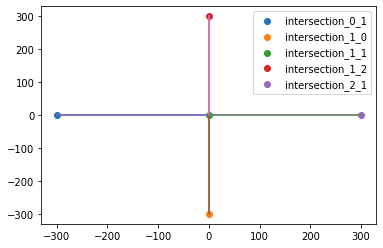

In [3]:
fig,ax = plt.subplots()
for intersection in data['intersections']:
    ax.scatter(*intersection['point'].values(),label=intersection['id'])
    ax.legend()
for road in data['roads']:
    points = np.array([list(p.values()) for p in road['points']])
    X = points[:,0]
    Y = points[:,1]
    ax.plot(X,Y)

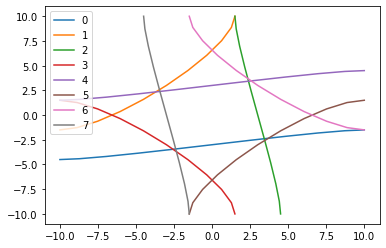

In [4]:
fig,ax = plt.subplots()
for count,roadLink in enumerate(data['intersections'][2]['roadLinks']):
    points = np.array([list(p.values()) for p in roadLink['laneLinks'][0]['points']])
    X = points[:,0]
    Y = points[:,1]
    ax.plot(X,Y,label=f'{count}')
ax.legend()

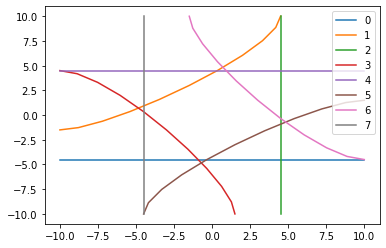

In [5]:
fig,ax = plt.subplots()
for count,roadLink in enumerate(data['intersections'][2]['roadLinks']):
    points = np.array([list(p.values()) for p in roadLink['laneLinks'][1]['points']])
    X = points[:,0]
    Y = points[:,1]
    ax.plot(X,Y,label=f'{count}')

ax.legend()

In [88]:
class ROAD:
    def __init__(self):
        self.cars = []
        self.count_cars = 0
        self.semaforo = 
    
    def append_car(self,car):
        self.cars.append(car)
    
    def plot_cars_time(self,bins=60):
        times = [car.time for car in self.cars]
        fig,ax = plt.subplots()
        ax.hist(times,bins=bins)
        self.times = times
        counts,bins=np.histogram(self.times,bins=int(3600/(60*3)))
        self.distribution = counts/(3*60)
    
    def gerate_cars(self,time):
        i = time//(60*3)
        cars = Binomial(1.,probs=self.distribution[i])
        self.count_cars += cars.sample()
    

In [45]:
class CAR:
    def __init__(self,car):
        self.route = car['route']
        self.time = car['startTime'] 

In [46]:
road1 = ROAD()
road2 = ROAD()

In [47]:
for car in flow:
    c = CAR(car)
    if c.route[0] == 'road_0_1_0' or c.route[0] == 'road_2_1_2':
        road1.append_car(c)
    if c.route[0] == 'road_1_0_1' or c.route[0] == 'road_1_2_3':
        road2.append_car(c)

In [48]:
len(road1.cars),len(road2.cars),len(flow)

(1013, 1008, 2021)

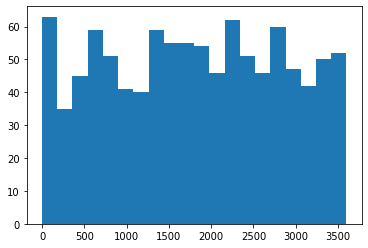

In [61]:
road1.plot_cars_time(bins=int(3600/(60*3)))

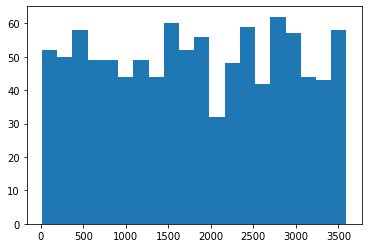

In [55]:
road2.plot_cars_time(int(3600/(60*3)))

In [66]:
count1,bins=np.histogram(road1.times,bins=int(3600/(60*3)))
count2,_=np.histogram(road2.times,bins=bins)

In [72]:
import tensorflow_probability as tfp
Binomial = tfp.distributions.Binomial

In [86]:
count1

array([63, 35, 45, 59, 51, 41, 40, 59, 55, 55, 54, 46, 62, 51, 46, 60, 47,
       42, 50, 52], dtype=int64)

In [87]:
for count in count1:
    cars = Binomial(1.,probs=count/(60*3))
    print(np.sum(cars.sample(60*3)))

66.0
33.0
51.0
63.0
45.0
36.0
42.0
58.0
54.0
58.0
60.0
43.0
61.0
43.0
60.0
52.0
44.0
42.0
49.0
53.0


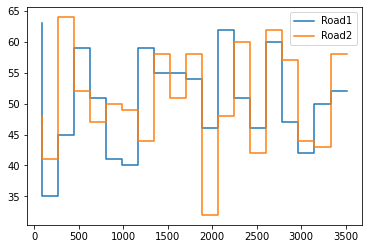

In [67]:
bincentres = [(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]
fig,ax = plt.subplots()
ax.step(bincentres,count1,label='Road1')
ax.step(bincentres,count2,label='Road2')
ax.legend()

In [69]:
#Low <= 50 cars/3min
#High <= 50 cars/3min
class SEMAFORO:
    def __init__(self,t):
        self.time = t
        self.state = False
    def change_state(self):
        self.state = not self.state
        return self.time+5 if not self.state else 1

class INTERSECTION:
    def __init__(self,Tlow,THigh):
        self.S1 = SEMAFORO(Tlow)
        self.S2 = SEMAFORO(Tlow)
        self.global_time = 0
    

array([   0.  ,  179.95,  359.9 ,  539.85,  719.8 ,  899.75, 1079.7 ,
       1259.65, 1439.6 , 1619.55, 1799.5 , 1979.45, 2159.4 , 2339.35,
       2519.3 , 2699.25, 2879.2 , 3059.15, 3239.1 , 3419.05, 3599.  ])